In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import os
import sklearn
import pickle

In [31]:
#load and read csv file
data_module= pd.read_csv("Position_Salaries.csv")
data_module.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [32]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [33]:
data_module.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [34]:
# Imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
data_module= data_module[['Level','Salary']]

In [35]:
data_module.dtypes

Level     int64
Salary    int64
dtype: object

In [36]:
data_module.isnull().sum()

Level     0
Salary    0
dtype: int64

In [37]:
#split dataset into train and test
train,test=train_test_split(data_module,test_size=0.3,random_state=0)
print("train",train.shape)
print("test",test.shape)

train (7, 2)
test (3, 2)


In [38]:
#save datafile into csv file
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index= False)

In [39]:
train_module= pd.read_csv("train.csv")
train_module.head()

,Level,Salary
0,10,1000000
1,2,50000
2,7,200000
3,8,300000
4,4,80000


In [40]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_module,test_size=0.3,random_state=0)

In [41]:
x_train= train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values

In [42]:
print("x train data:",x_train.shape)
# print(x_train)
print("y train data:",y_train.shape)

x train data: (4, 1)
y train data: (4,)


In [43]:
#feature scalling on cross-validate data
sc_x= StandardScaler()
sc_y= StandardScaler()
x_train= sc_x.fit_transform(x_train.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
y_train=sc_y.fit_transform(y_train.reshape(-1,1))

In [44]:
#fitting linear regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
#fitting polynomialfeature
poly_reg = PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_predict_train = lin_reg.predict(x_train)

In [47]:
y_predict_train

array([[ 0.54898959],
       [ 1.03698034],
       [-1.15897802],
       [-0.4269919 ]])

In [48]:
Accuracy = sklearn.metrics.r2_score(y_train,y_predict_train)*100 
print(Accuracy)

72.5567484999581


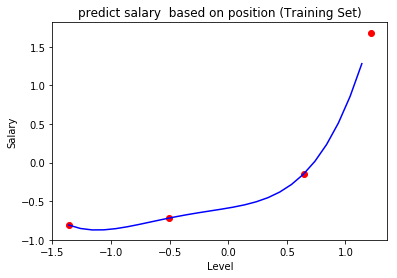

In [49]:
# visualizing the training set result
x_grid=np.arange(min(x_train),max(x_train),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('predict salary  based on position (Training Set)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [53]:
file = open("train_data.pkl",'wb')
pickle.dump(lin_reg,file)
file.close()

In [54]:
# file1= open("train_data.pkl",'rb')
# lin_reg1=pickle.load(file1)

In [55]:
cv_data.to_csv('cv_data.csv',index=False)

In [56]:
cv_data_x= cv_data.iloc[:,:-1].values
cv_data_y=cv_data.iloc[:,1].values

In [57]:
print("cross validate data x",cv_data_x.shape)
print("cross validate data y",cv_data_y.shape)

cross validate data x (3, 1)
cross validate data y (3,)


In [58]:
#feature scalling on cross-validate data
sc_cv_x= StandardScaler()
sc_cv_y= StandardScaler()
cv_data_x= sc_cv_x.fit_transform(cv_data_x.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
cv_data_y=sc_cv_y.fit_transform(cv_data_y.reshape(-1,1))


In [63]:
file1= open("train_data.pkl",'rb')
lin_reg1 = pickle.load(file1)

In [64]:
y_predict_cv = lin_reg1.predict(cv_data_x)
print(len(y_predict_cv), cv_data_x.shape)

3 (3, 1)


In [65]:
y_predict_cv

array([[ 0.39430793],
       [ 0.78861587],
       [-1.1829238 ]])

In [66]:
Accuracy = sklearn.metrics.r2_score(cv_data_y,y_predict_cv)*100
print(Accuracy)
# accuracy= mean_squared_error(cv_data_x,y_predict_cv)*100
# accuracy

96.0564165027441


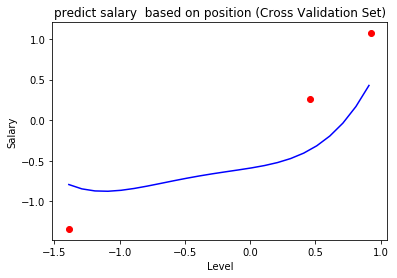

In [67]:
     
# visualizing the testing set result
x_grid=np.arange(min(cv_data_x),max(cv_data_x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(cv_data_x,cv_data_y,color='red')
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('predict salary  based on position (Cross Validation Set)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()